In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
dataDir='annotations'
picDir='pic/train'
dataType='train2014'
annFile='%s/instances_%s.json'%(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=20.54s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print 'COCO categories: \n\n', ' '.join(nms)

nms_set = set([cat['supercategory'] for cat in cats])
print 'COCO supercategories: \n', ' '.join(nms_set)

COCO categories: 

person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush
COCO supercategories: 
outdoor food indoor appliance sports person animal vehicle furniture accessory electronic kitchen


## Here you can check any image

COCO_train2014_000000000620.jpg


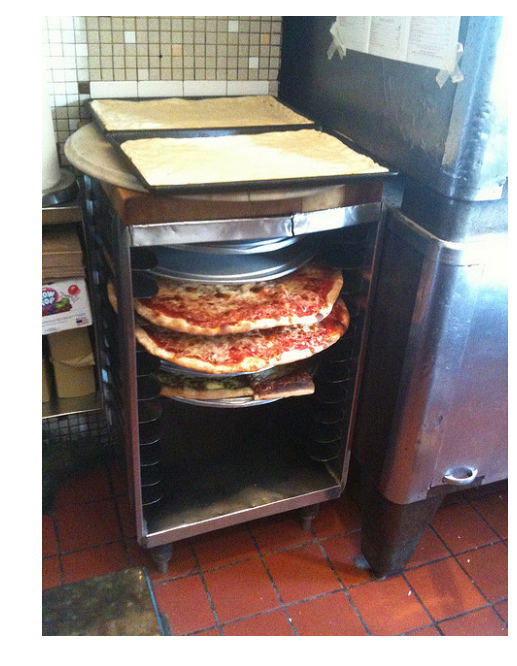

Categories: set([u'refrigerator', u'pizza'])
Supercategories: set([u'food', u'appliance'])


In [24]:
imgIds = [620]

myImgIds = coco.getImgIds(imgIds)
myImg = coco.loadImgs(myImgIds)
myImgAnnIds = coco.getAnnIds(imgIds=myImgIds, iscrowd=False)
myImgAnns = coco.loadAnns(myImgAnnIds)

myImgName = myImg[0]['file_name']
print myImgName
# load and display image
I = io.imread('%s/%s'%(picDir, myImgName))
# use url to load image
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

anns_list = [ann['category_id'] for ann in myImgAnns]
names = [cat['name'] for cat in coco.loadCats(anns_list)]
supercatnames = [cat['supercategory'] for cat in coco.loadCats(anns_list)]
print 'Categories:', set(names)
print 'Supercategories:', set(supercatnames)

In [25]:
print coco.loadCats(myImgAnns[np.argmax([ann['area'] for ann in myImgAnns])]['category_id'])[0]

{u'supercategory': u'appliance', u'id': 82, u'name': u'refrigerator'}


In [23]:
coco.loadCats([82])

[{u'id': 82, u'name': u'refrigerator', u'supercategory': u'appliance'}]